In [1]:
# Import modules

# Data
import pandas as pd

# Math and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
%matplotlib inline
plt.style.use('ggplot')

# Stats
import scipy.stats as ss

In [2]:
# Load the data set
userdf = pd.read_csv("Translation_Test/user_table.csv")
testdf = pd.read_csv("Translation_Test/test_table.csv")

In [3]:
# Preview data
userdf.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [4]:
testdf.head(10)

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1
5,540675,2015-12-03,Direct,Mobile,ES,NaN,Android_App,0,1
6,863394,2015-12-04,SEO,Mobile,Other,NaN,Android_App,0,0
7,527287,2015-12-03,Direct,Web,EN,NaN,Chrome,0,0
8,261625,2015-12-04,Direct,Mobile,ES,NaN,Android_App,0,1
9,10427,2015-12-04,Ads,Mobile,ES,Facebook,Android_App,0,0


In [5]:
userdf.describe()

,user_id,age
count,452867.000000,452867.000000
mean,499944.805166,27.130740
std,288676.264784,6.776678
min,1.000000,18.000000
25%,249819.000000,22.000000
50%,500019.000000,26.000000
75%,749543.000000,31.000000
max,1000000.000000,70.000000


In [6]:
testdf.describe()

,user_id,conversion,test
count,453321.000000,453321.000000,453321.000000
mean,499937.514728,0.049579,0.476446
std,288665.193436,0.217073,0.499445
min,1.000000,0.000000,0.000000
25%,249816.000000,0.000000,0.000000
50%,500019.000000,0.000000,0.000000
75%,749522.000000,0.000000,1.000000
max,1000000.000000,1.000000,1.000000


In [7]:
userdf = userdf.set_index("user_id")
userdf.head()

,sex,age,country
user_id,,,
765821,M,20,Mexico
343561,F,27,Nicaragua
118744,M,23,Colombia
987753,F,27,Venezuela
554597,F,20,Spain


In [8]:
testdf = testdf.set_index("user_id")
testdf.head()

,date,source,device,browser_language,ads_channel,browser,conversion,test
user_id,,,,,,,,
315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [9]:
# Let's join the two df's into one based on user_id
df = userdf.join(testdf)
df.head()

,sex,age,country,date,source,device,browser_language,ads_channel,browser,conversion,test
user_id,,,,,,,,,,,
765821,M,20,Mexico,2015-12-02,Ads,Mobile,ES,Yahoo,Android_App,0,1
343561,F,27,Nicaragua,2015-12-04,Ads,Web,ES,Facebook,Safari,0,0
118744,M,23,Colombia,2015-11-30,Ads,Mobile,ES,Facebook,Android_App,0,1
987753,F,27,Venezuela,2015-12-04,SEO,Web,ES,NaN,IE,0,1
554597,F,20,Spain,2015-12-04,Direct,Web,ES,NaN,Chrome,0,0


In [10]:
df.describe()

,age,conversion,test
count,452867.000000,452867.000000,452867.000000
mean,27.130740,0.049560,0.476462
std,6.776678,0.217034,0.499446
min,18.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000
75%,31.000000,0.000000,1.000000
max,70.000000,1.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452867 entries, 765821 to 314649
Data columns (total 11 columns):
sex                 452867 non-null object
age                 452867 non-null int64
country             452867 non-null object
date                452867 non-null object
source              452867 non-null object
device              452867 non-null object
browser_language    452867 non-null object
ads_channel         181693 non-null object
browser             452867 non-null object
conversion          452867 non-null int64
test                452867 non-null int64
dtypes: int64(3), object(8)
memory usage: 41.5+ MB


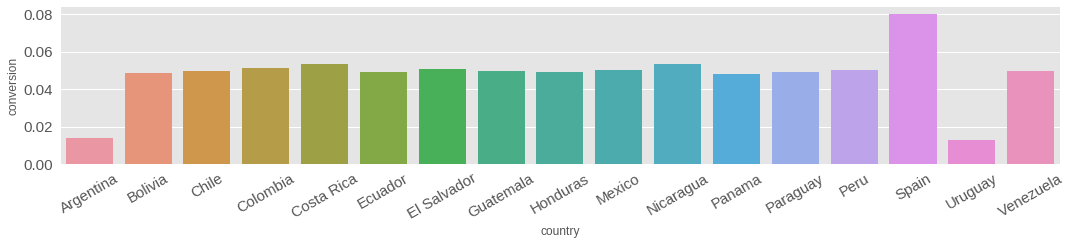

In [12]:
# Group conversion rates by country
data_country = df[["country", "conversion"]].groupby(["country"], as_index=False).mean()

g = sns.factorplot(x="country", y="conversion", data=data_country, kind="bar", size=3, aspect=5)
g.set_xticklabels(rotation=30)

In [13]:
# Todo T-test